In [38]:
import pandas as pd
import ffn
import pandas_datareader as pdat
import datetime as dt
%matplotlib inline

pdat.get_data_yahoo('cfw.to', start='2010-01-01', end='2017-01-01').head()

In [18]:
today=dt.datetime.now() 
yesterday=today-dt.timedelta(days=1)
today_date=today.date().strftime('%Y-%m-%d')
yesterday_date=yesterday.date().strftime('%Y-%m-%d')
print(today_date,yesterday_date )

2017-11-08 2017-11-07


In [19]:
#enddate= today_date
enddate=yesterday_date

In [20]:
data = ffn.get(['cfw.to','abcn.v','kat.to','tcw.to','tei.to','tko.to','u.to','xeg.to'], start='2016-01-01', end=enddate)
data.describe()#.tail()

,cfwto,abcnv,katto,tcwto,teito,tkoto,uto,xegto
count,129.000000,129.000000,129.000000,129.000000,129.00000,129.000000,129.000000,129.000000
mean,3.713721,0.952054,0.766744,3.962481,0.98969,2.064419,3.725736,11.423396
std,0.854747,0.088542,0.266215,0.505620,0.13625,0.457925,0.131831,0.617263
min,2.300000,0.830000,0.360000,3.210000,0.79000,1.470000,3.490000,10.403746
25%,3.270000,0.890000,0.540000,3.490000,0.90000,1.650000,3.620000,10.870770
50%,3.430000,0.930000,0.750000,3.900000,0.96000,1.950000,3.720000,11.369355
75%,4.610000,0.990000,0.950000,4.340000,1.05000,2.390000,3.840000,11.934000
max,5.640000,1.240000,1.390000,5.290000,1.32000,2.920000,4.020000,12.890000


In [21]:
data1 = ffn.get(['ghg.cn'], start='2016-01-01', end=today)
data1#.tail()

,ghgcn
Date,
2017-11-08,0.04


In [22]:
returns = data.to_log_returns()#.dropna()
returns.head()

,cfwto,abcnv,katto,tcwto,teito,tkoto,uto,xegto
Date,,,,,,,,
2017-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-05,0.073203,0.000000,0.027399,0.088107,0.016529,0.013514,-0.007663,0.028726
2017-05-08,0.002937,-0.009950,0.052644,-0.021925,0.008163,-0.013514,0.007663,0.015255
2017-05-09,-0.035825,-0.105361,0.000000,-0.022417,0.000000,0.033448,-0.007663,-0.010413
2017-05-10,0.059014,-0.045462,0.000000,0.075187,0.008097,0.013072,0.000000,0.019929


In [23]:
ax = returns.hist(figsize=(16, 10))

In [24]:
returns.corr().as_format('.2f')

,cfwto,abcnv,katto,tcwto,teito,tkoto,uto,xegto
cfwto,1.00,0.09,0.13,0.72,0.28,0.16,-0.12,0.63
abcnv,0.09,1.00,0.06,0.01,-0.10,0.11,-0.03,-0.01
katto,0.13,0.06,1.00,-0.02,0.02,0.22,-0.02,0.02
tcwto,0.72,0.01,-0.02,1.00,0.33,0.09,-0.05,0.74
teito,0.28,-0.10,0.02,0.33,1.00,0.20,-0.14,0.27
tkoto,0.16,0.11,0.22,0.09,0.20,1.00,0.27,0.10
uto,-0.12,-0.03,-0.02,-0.05,-0.14,0.27,1.00,-0.02
xegto,0.63,-0.01,0.02,0.74,0.27,0.10,-0.02,1.00


In [25]:
returns.plot_corr_heatmap()

<module 'matplotlib.pyplot' from 'H:\\windows_program_files\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

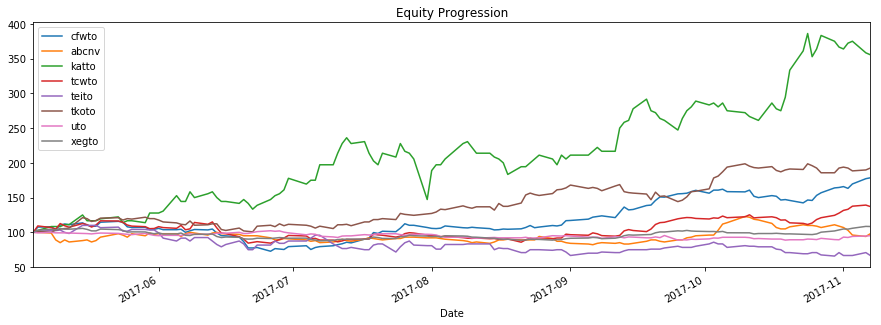

In [39]:
perf = data.calc_stats()
perf.plot()

In [27]:
perf.plot_scatter_matrix()

H:\windows_program_files\Anaconda3\lib\site-packages\ffn\core.py:855: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  pd.scatter_matrix(ser, figsize=figsize, **kwargs)


In [40]:
perf.display()


Stat                 cfwto       abcnv       katto       tcwto       teito       tkoto       uto         xegto
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2017-05-04  2017-05-04  2017-05-04  2017-05-04  2017-05-04  2017-05-04  2017-05-04  2017-05-04
End                  2017-11-07  2017-11-07  2017-11-07  2017-11-07  2017-11-07  2017-11-07  2017-11-07  2017-11-07
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         78.48%      -1.98%      255.56%     37.11%      -33.33%     92.52%      -4.83%      8.39%
Daily Sharpe         2.57        0.14        3.05        1.53        -0.82       2.82        -0.36       0.89
Daily Sortino        3.61        0.24        4.63        2.76        -1.16       5.73        -0.47       1.44
CAGR                 210.04%     -3.83%      1091.34%    85.22%      -54.70%     259.44%     -9.23

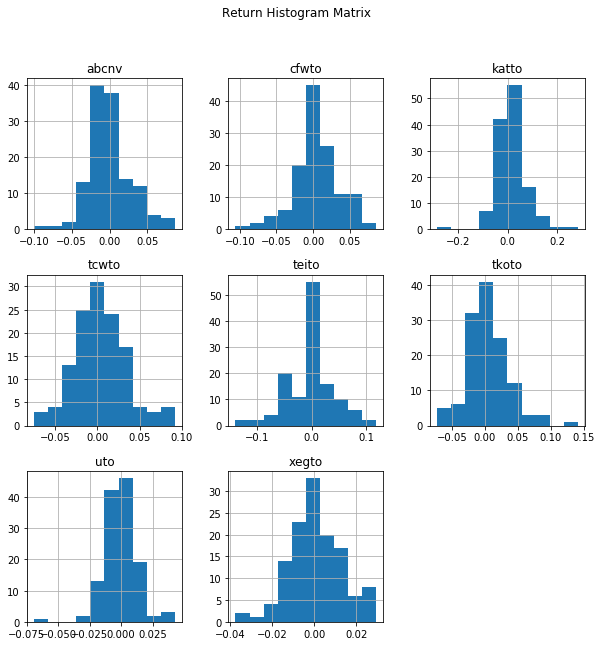

In [41]:
perf.plot_histograms()

H:\windows_program_files\Anaconda3\lib\site-packages\ffn\core.py:855: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  pd.scatter_matrix(ser, figsize=figsize, **kwargs)


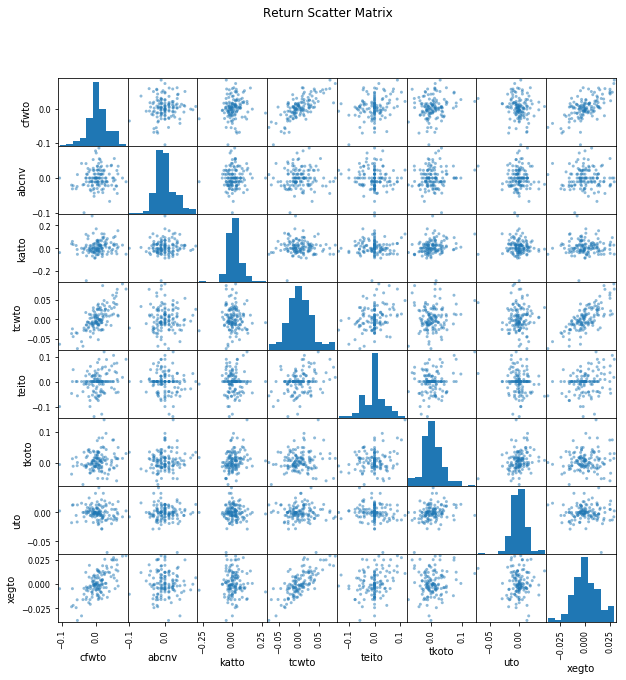

In [46]:
perf.plot_scatter_matrix()#.to_excel('test.xlsx', sheet_name='sheet1', index=False)

In [29]:
# we can also use perf[2] in this case
temp=perf['katto']
temp.display_lookback_returns()#daily_prices

mtd         -3.03%
3m          72.97%
6m         245.95%
ytd        255.56%
1y            nan%
3y            nan%
5y            nan%
10y           nan%
incep    1,091.34%
Name: katto, dtype: object

In [30]:
# we can also use perf[2] in this case
temp=perf['katto']
temp.display_monthly_returns()#daily_prices

  Year    Jan    Feb    Mar    Apr    May    Jun     Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  -----  -----  -----  -----  ------  -----  -----  -----  -----  -----  ------
  2017      0      0      0      0  27.78  39.13  -17.19  39.62  40.54  26.92  -3.03      0  255.56


In [31]:
returns.corr().as_format('.2f')

,cfwto,abcnv,katto,tcwto,teito,tkoto,uto,xegto
cfwto,1.00,0.09,0.13,0.72,0.28,0.16,-0.12,0.63
abcnv,0.09,1.00,0.06,0.01,-0.10,0.11,-0.03,-0.01
katto,0.13,0.06,1.00,-0.02,0.02,0.22,-0.02,0.02
tcwto,0.72,0.01,-0.02,1.00,0.33,0.09,-0.05,0.74
teito,0.28,-0.10,0.02,0.33,1.00,0.20,-0.14,0.27
tkoto,0.16,0.11,0.22,0.09,0.20,1.00,0.27,0.10
uto,-0.12,-0.03,-0.02,-0.05,-0.14,0.27,1.00,-0.02
xegto,0.63,-0.01,0.02,0.74,0.27,0.10,-0.02,1.00


In [32]:
perf[2].plot_histogram()

In [33]:
perf['katto'].stats

start                2017-05-04 00:00:00
end                  2017-11-07 00:00:00
rf                                     0
total_return                     2.55556
daily_sharpe                      3.0538
daily_sortino                    4.62947
cagr                             10.9134
max_drawdown                   -0.376471
calmar                           28.9888
mtd                            -0.030303
three_month                      0.72973
six_month                        2.45946
one_year                             NaN
daily_mean                       2.98135
daily_vol                       0.976276
daily_skew                      0.183577
daily_kurt                       6.04613
best_day                        0.283019
worst_day                      -0.283784
monthly_sharpe                   2.90834
monthly_sortino                  7.26681
monthly_mean                     2.51998
monthly_vol                     0.866465
monthly_skew                   -0.948492
monthly_kurt    

In [34]:
returns.calc_mean_var_weights().as_format('.2%')

Exception: Iteration limit exceeded

In [ ]:
returns.calc_ftca(threshold=0.8)

In [ ]:
ffn.get('aapl:Open,aapl:High,aapl:Low,aapl:Close', start='2010-01-01', enddate='2014-01-01').head()

In [ ]:
 import ffn
>> returns = ffn.get('aapl,msft,c,gs,ge', start='2010-01-01').to_returns().dropna()
>> returns.calc_mean_var_weights().as_format('.2%')